# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather" 
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&q={city}&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | show low
Processing Record 2 of Set 1 | aksu
Processing Record 3 of Set 1 | miri
Processing Record 4 of Set 1 | kribi
Processing Record 5 of Set 1 | vila
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | urucara
Processing Record 10 of Set 1 | turbat
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | sao jose da coroa grande
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | reconquista
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 19 of Set 1 | port blair
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | chuy

Processing Record 35 of Set 4 | yurimaguas
Processing Record 36 of Set 4 | kavaratti
Processing Record 37 of Set 4 | payson
Processing Record 38 of Set 4 | samusu
City not found. Skipping...
Processing Record 39 of Set 4 | bandarbeyla
Processing Record 40 of Set 4 | cururupu
Processing Record 41 of Set 4 | rabo de peixe
Processing Record 42 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | dryden
Processing Record 45 of Set 4 | irbeyskoye
Processing Record 46 of Set 4 | lubumbashi
Processing Record 47 of Set 4 | vila franca do campo
Processing Record 48 of Set 4 | khvorostyanka
Processing Record 49 of Set 4 | ancud
Processing Record 0 of Set 5 | grindavik
Processing Record 1 of Set 5 | puerto pinasco
City not found. Skipping...
Processing Record 2 of Set 5 | nome
Processing Record 3 of Set 5 | dandong
Processing Record 4 of Set 5 | halalo
City not found. Skipping...
Processing Record 5 of Set 5 | vega baja
Processi

Processing Record 22 of Set 8 | trinidad
Processing Record 23 of Set 8 | ust-tsilma
Processing Record 24 of Set 8 | west bay
Processing Record 25 of Set 8 | constantine
Processing Record 26 of Set 8 | dingtao
Processing Record 27 of Set 8 | flagstaff
Processing Record 28 of Set 8 | college
Processing Record 29 of Set 8 | katobu
Processing Record 30 of Set 8 | anloga
Processing Record 31 of Set 8 | cantapoy
Processing Record 32 of Set 8 | ampanihy
Processing Record 33 of Set 8 | victor harbor
Processing Record 34 of Set 8 | asau
Processing Record 35 of Set 8 | bumbuna
Processing Record 36 of Set 8 | havre-saint-pierre
Processing Record 37 of Set 8 | vaitape
Processing Record 38 of Set 8 | ahipara
Processing Record 39 of Set 8 | raahe
Processing Record 40 of Set 8 | saldanha
Processing Record 41 of Set 8 | deputatskiy
Processing Record 42 of Set 8 | zeya
Processing Record 43 of Set 8 | basco
Processing Record 44 of Set 8 | macau
Processing Record 45 of Set 8 | galesong
Processing Record 

Processing Record 10 of Set 12 | kimberley
Processing Record 11 of Set 12 | uroteppa
City not found. Skipping...
Processing Record 12 of Set 12 | kharsia
Processing Record 13 of Set 12 | ler
Processing Record 14 of Set 12 | chintamani
Processing Record 15 of Set 12 | sao joao da barra
Processing Record 16 of Set 12 | binzhou
Processing Record 17 of Set 12 | ndele
Processing Record 18 of Set 12 | nuevo progreso
Processing Record 19 of Set 12 | mirabad
Processing Record 20 of Set 12 | port-gentil
Processing Record 21 of Set 12 | nantucket
Processing Record 22 of Set 12 | walvis bay
Processing Record 23 of Set 12 | bad munstereifel
Processing Record 24 of Set 12 | portland
Processing Record 25 of Set 12 | mendahara
City not found. Skipping...
Processing Record 26 of Set 12 | boshnyakovo
Processing Record 27 of Set 12 | inhambane
Processing Record 28 of Set 12 | umm jarr
City not found. Skipping...
Processing Record 29 of Set 12 | bollnas
Processing Record 30 of Set 12 | lamu
Processing Re

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,show low,34.2542,-110.0298,3.38,89,75,3.09,US,1672365128
1,aksu,41.1231,80.2644,-7.52,61,100,0.78,CN,1672365391
2,miri,4.4148,114.0089,26.76,88,40,3.09,MY,1672365392
3,kribi,2.9500,9.9167,26.34,84,100,2.10,CM,1672365392
4,vila,42.0304,-8.1588,9.49,96,100,5.01,PT,1672365393


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,show low,34.2542,-110.0298,3.38,89,75,3.09,US,1672365128
1,aksu,41.1231,80.2644,-7.52,61,100,0.78,CN,1672365391
2,miri,4.4148,114.0089,26.76,88,40,3.09,MY,1672365392
3,kribi,2.9500,9.9167,26.34,84,100,2.10,CM,1672365392
4,vila,42.0304,-8.1588,9.49,96,100,5.01,PT,1672365393


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

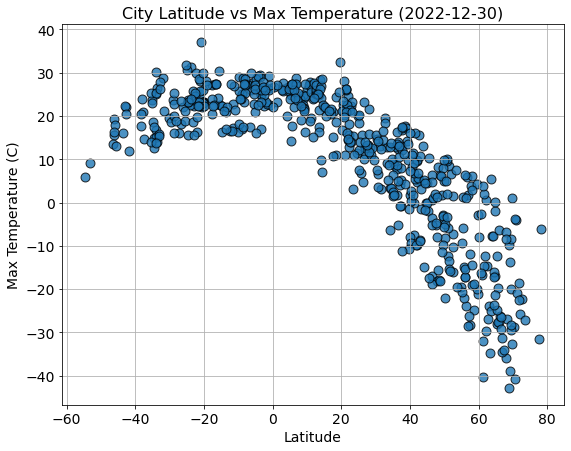

In [14]:
# Set the size of the plot
plt.figure(figsize=(9, 7))

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({time.strftime('%Y-%m-%d')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Max Temperature (C)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

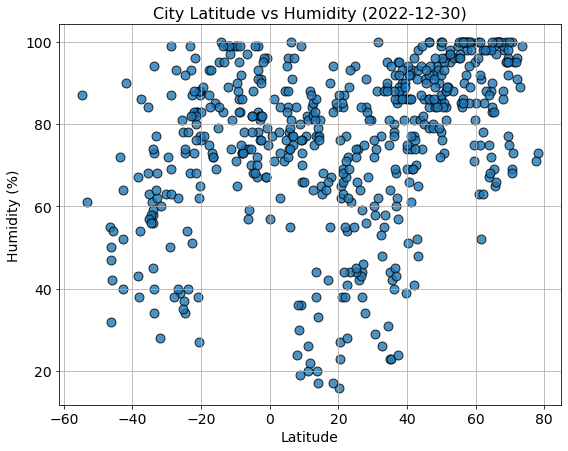

In [15]:
# Set the size of the plot
plt.figure(figsize=(9, 7))

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({time.strftime('%Y-%m-%d')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Humidity (%)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

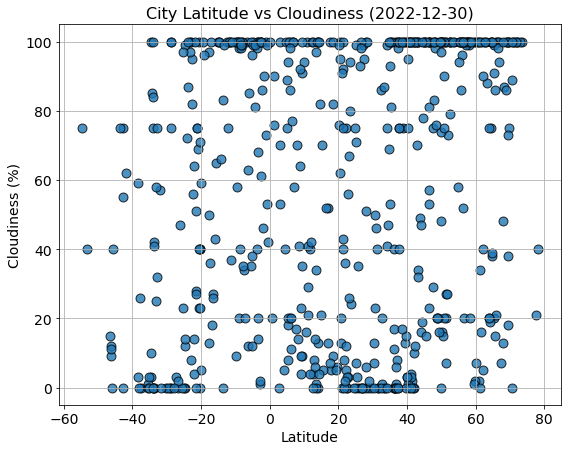

In [16]:
# Set the size of the plot
plt.figure(figsize=(9, 7))

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({time.strftime('%Y-%m-%d')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Cloudiness (%)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

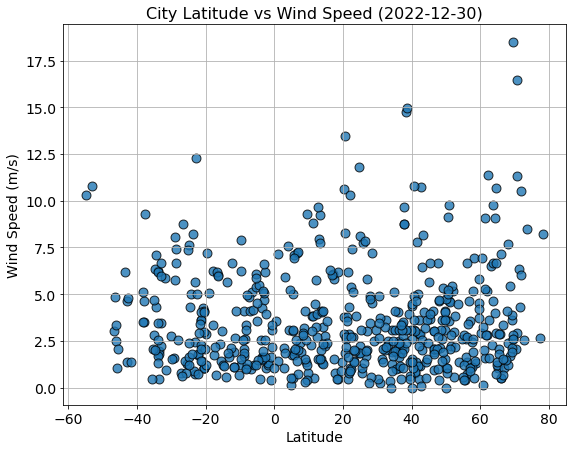

In [17]:
# Set the size of the plot
plt.figure(figsize=(9, 7))

# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolor="black",linewidth=1,marker="o", alpha=0.8, s=80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({time.strftime('%Y-%m-%d')})",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Wind Speed (m/s)",fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def lin_regress(x_values,y_values,xlabel,ylabel,xytext):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(9,7))
    plt.scatter(x_values, y_values, s=80)
    plt.plot(x_values,regress_values,"red",linewidth=2)
    plt.annotate(line_eq,xytext,fontsize=20,color="red")
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.tick_params(labelsize=14)
    print(f'The r-value is:{r_value}')
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,show low,34.2542,-110.0298,3.38,89,75,3.09,US,1672365128
1,aksu,41.1231,80.2644,-7.52,61,100,0.78,CN,1672365391
2,miri,4.4148,114.0089,26.76,88,40,3.09,MY,1672365392
3,kribi,2.9500,9.9167,26.34,84,100,2.10,CM,1672365392
4,vila,42.0304,-8.1588,9.49,96,100,5.01,PT,1672365393


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,punta arenas,-53.1500,-70.9167,9.06,61,40,10.80,CL,1672365394
7,rikitea,-23.1203,-134.9692,25.77,68,100,2.41,PF,1672365395
8,urucara,-2.5364,-57.7600,22.33,91,100,1.02,BR,1672365396
10,new norfolk,-42.7826,147.0587,22.06,40,0,1.34,AU,1672365398
11,sao jose da coroa grande,-8.8978,-35.1478,25.15,86,98,4.07,BR,1672365398


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8675543370257127


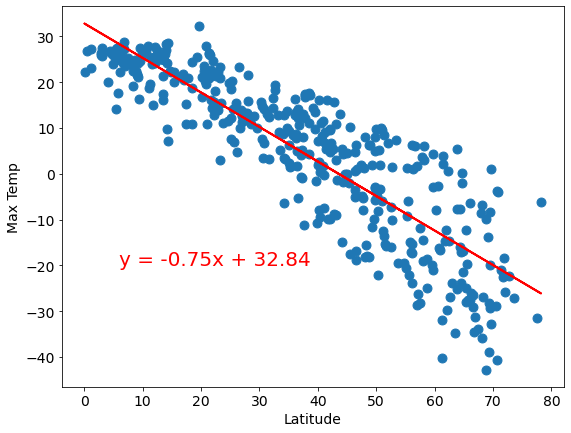

In [21]:
# Linear regression on Northern Hemisphere
lin_regress(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Max Temp"],xlabel = "Latitude",
            ylabel = "Max Temp",xytext = (6,-20))

The r-value is:0.4949517223371052


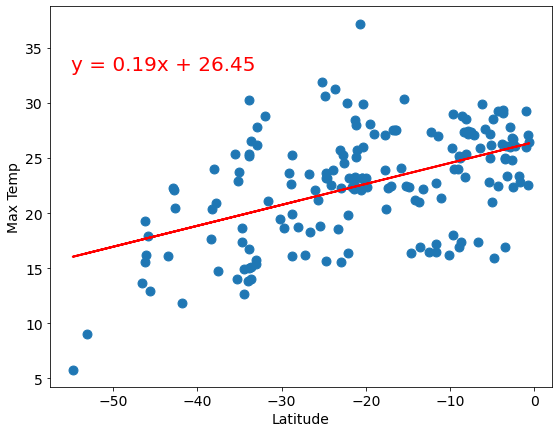

In [22]:
# Linear regression on Southern Hemisphere
lin_regress(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Max Temp"],xlabel = "Latitude",
            ylabel = "Max Temp",xytext = (-55,33))

**Discussion about the linear relationship:** 

The r_value for the Northern Hemisphere is significantly stronger than the r_value for the Southern Hemisphere, indicating that the linear relationship between latitude and maximum temperature is stronger in the Northern Hemisphere.

The negative r_value for the Northern Hemisphere suggests that as latitude increases, maximum temperature decreases. This aligns with the fact that as latitude increases you are moving further from the equator, where temperatures are generally warmer.On the otherhand the positive r_value for the Southern Hemisphere suggests that as latitude increases, maximum temperature also increases. In this case as the latitude increases we are moving closer to the warmer equator.

The strength of the linear relationship between latitude and maximum temperature varies significantly between the two hemispheres, indicating that other factors, such as proximity to oceans and elevation, may also play a role in determining temperature. It is important to note that while a linear relationship is present, it is not necessarily a perfect correlation. There may be other factors influencing maximum temperature at a given latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.4349089362683239


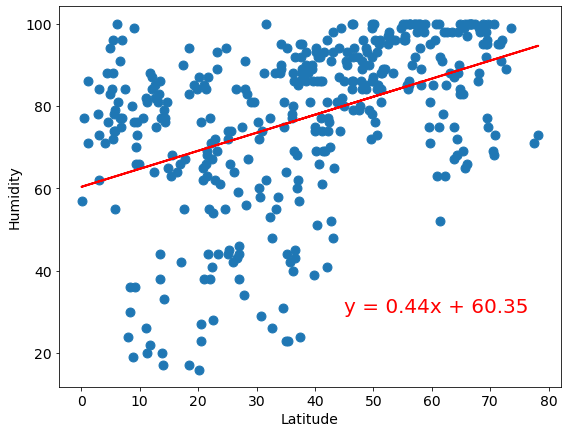

In [27]:
# Northern Hemisphere
lin_regress(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Humidity"],xlabel = "Latitude",
            ylabel = "Humidity",xytext = (45,30))

The r-value is:0.49718346269560537


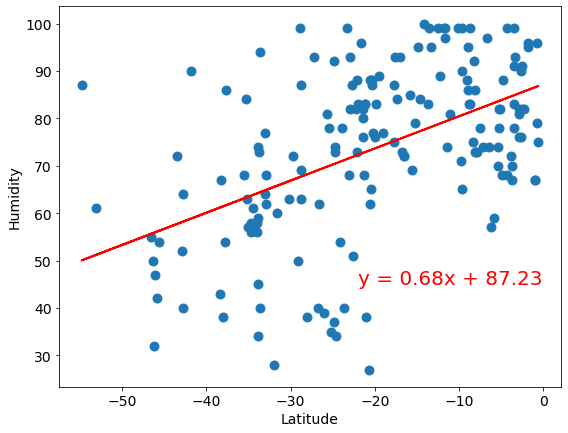

In [29]:
# Southern Hemisphere
lin_regress(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Humidity"],xlabel = "Latitude",
            ylabel = "Humidity",xytext = (-22,45))

**Discussion about the linear relationship:** 

The r_value for both the Northern and Southern Hemispheres is relatively weak, indicating that the linear relationship between latitude and humidity is not particularly strong.

Both the Northern and Southern Hemisphere show a positive r_value, suggesting that as latitude increases, humidity also increases. This may be due to the fact that higher latitudes generally experience more humid conditions due to the presence of bodies of water, such as oceans and lakes.

The slightly stronger r_value in the Southern Hemisphere may be attributed to the presence of large rainforests such as the Amazon rainforest, which is known for its high levels of humidity.It is important to note that other factors, such as the presence of mountains or desert regions, can also significantly impact humidity levels at a given latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.2420625817809406


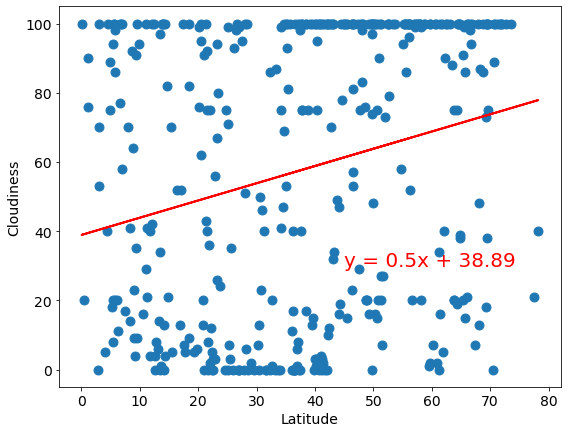

In [30]:
# Northern Hemisphere
lin_regress(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Cloudiness"],xlabel = "Latitude",
            ylabel = "Cloudiness",xytext = (45,30))

The r-value is:0.39953435653049296


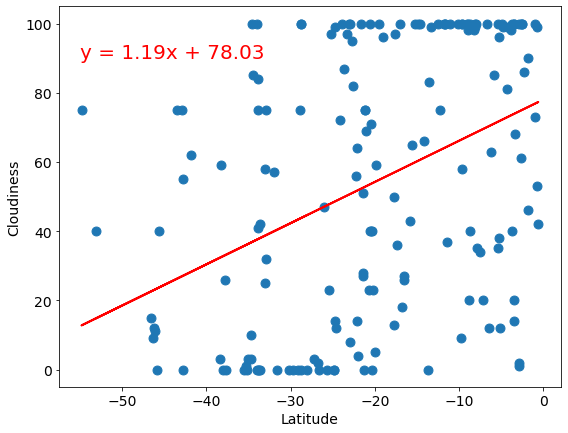

In [35]:
# Southern Hemisphere
lin_regress(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Cloudiness"],xlabel = "Latitude",
            ylabel = "Cloudiness",xytext = (-55,90))

**Discussion about the linear relationship:** 

The r_value for both the Northern and Southern Hemispheres is relatively weak, indicating that the linear relationship between latitude and cloudiness is not particularly strong.

Both the Northern and Southern Hemisphere show a positive r_value, suggesting that as latitude increases, cloudiness also increases. The slightly stronger r_value in the Southern Hemisphere may be due to the presence of more mountainous regions in the Southern Hemisphere, which can also contribute to the formation of clouds.

It is important to note that many other factors can also significantly impact cloudiness levels at a given latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.07773459561972004


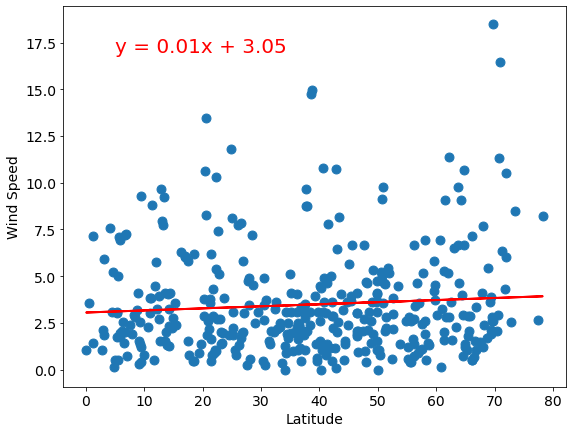

In [40]:
# Northern Hemisphere
lin_regress(x_values = northern_hemi_df["Lat"], y_values = northern_hemi_df["Wind Speed"],xlabel = "Latitude",
            ylabel = "Wind Speed",xytext = (5,17))

The r-value is:-0.20502693153504428


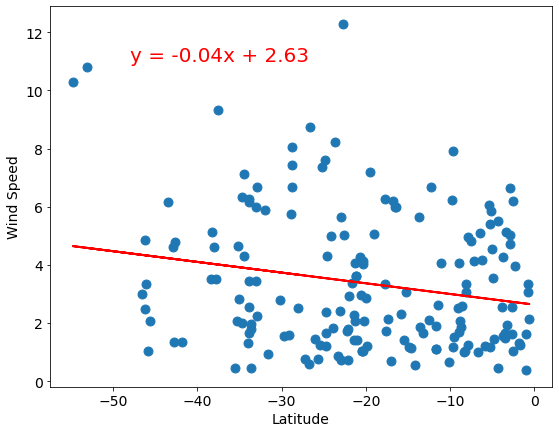

In [39]:
# Southern Hemisphere
lin_regress(x_values = southern_hemi_df["Lat"], y_values = southern_hemi_df["Wind Speed"],xlabel = "Latitude",
            ylabel = "Wind Speed",xytext = (-48,11))

**Discussion about the linear relationship:** 

The r_value for both the Northern and Southern Hemispheres is relatively weak, indicating that the linear relationship between latitude and wind speed is not particularly strong.

The Northern Hemisphere shows a positive r_value while the Southern Hemisphere shows a negative r_value, suggesting that the relationship between latitude and wind speed may vary depending on the hemisphere.

It is important to note that other factors, such as the presence of mountains or desert regions, can also significantly impact wind speeds at a given latitude.